In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from datetime import datetime
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/colab/car-prices.csv', index_col=0)

In [7]:
df.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


### Tratamento

In [8]:
rename = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

df = df.rename(columns=rename)
df.head()

,milhas_por_ano,ano_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [9]:
df['vendido'] = df['vendido'].map({'yes':1, 'no':0})

In [10]:
df['idade'] = datetime.today().year -  df['ano_modelo']

In [11]:
df['km_por_ano'] = round(df['milhas_por_ano'] * 1.60934, 2)

In [12]:
df.drop(columns=['milhas_por_ano', 'ano_modelo'], inplace=True)

In [13]:
df['km_total'] = df['idade'] * df['km_por_ano']

In [16]:
# df.to_csv('cars_price_clean.csv')

### Análise

In [17]:
# df = pd.read_csv('cars_price_clean.csv')

In [14]:
df.corr()

,preco,vendido,idade,km_por_ano,km_total
preco,1.000000,-0.437865,-0.207001,-0.020552,-0.138013
vendido,-0.437865,1.000000,0.071855,-0.137252,-0.063764
idade,-0.207001,0.071855,1.000000,0.016486,0.592287
km_por_ano,-0.020552,-0.137252,0.016486,1.000000,0.787754
km_total,-0.138013,-0.063764,0.592287,0.787754,1.000000


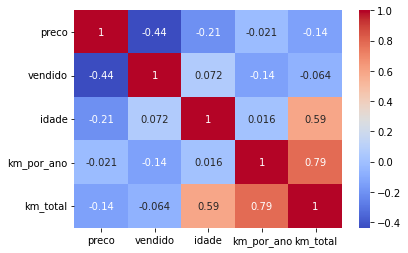

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Model

In [21]:
def set_target(df, target):
  X = df.drop(target, axis=1)
  Y = df[target]
  return X, Y

In [25]:
def get_train_test(X,Y,test_size):  
  x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=test_size, 
                                                    random_state=42,
                                                    stratify=Y)
  return x_train, x_test, y_train, y_test

In [26]:
def model_apply(model, xTrain, yTrain, xTest):
  model.fit(xTrain, yTrain)
  yHat = model.predict(xTest)
  return yHat

In [61]:
def evaluate_model(yReal, yHat):
  acuracia = accuracy_score(yReal, yHat)
  precisao = precision_score(yReal, yHat)
  recall = recall_score(yReal, yHat)
  print('Accuracy: ', acuracia * 100) 
  print('Precision: ', precisao * 100) 
  print('Recall: ', recall * 100)
  print('---------------------\n') 

  cmf = confusion_matrix(yReal, yHat)
  sns.heatmap(pd.DataFrame(cmf), annot=True, fmt='g')
  plt.xlabel('P R E D I C T')
  plt.ylabel('R E A L')
  plt.show()

In [66]:
def pipeline(model, df, target):
  X, Y = set_target(df, target)
  x_train, x_test, y_train, y_test = get_train_test(X, Y, 0.3)
  y_hat = model_apply(model, x_train, y_train, x_test)
  evaluate_model(y_test, y_hat)


In [72]:
model_tree = DecisionTreeClassifier(max_depth=3)
model_dummy = DummyClassifier()

In [75]:
my_models = {
    'Árvore de Decisão': model_tree, 
    'Classificador Dummy': model_dummy
  }

ÁRVORE DE DECISÃO
Accuracy:  78.43333333333334
Precision:  84.96481126039667
Recall:  76.32183908045977
---------------------



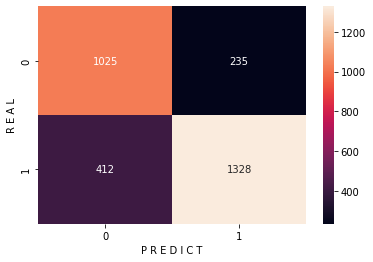

CLASSIFICADOR DUMMY
Accuracy:  57.99999999999999
Precision:  57.99999999999999
Recall:  100.0
---------------------



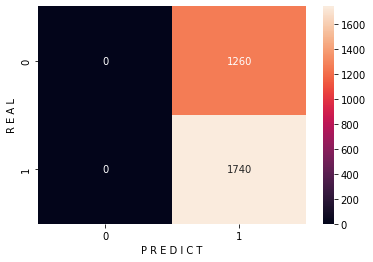

In [79]:
for name, model in my_models.items():
  print(f'{name.upper()}')
  pipeline(model, df, 'vendido')